# Working with Python on the ACCRE Cluster

## Overview

1. Intro to Python
1. Python versions on the cluster
1. Virtual Environments
1. Anaconda
1. Jupyter notebooks

## Intro to Python

1. Assumes the programmer knows what she/he is doing!
1. High-level language
1. Generally intuitive syntax
1. Highly popular (First appeared Feb. 1991)
1. Rich with non-standard libraries
    1. numpy -> Matlab-like matrix-vector operations
    1. pandas -> R-like data frames
    1. matplotlib -> plotting
    1. requests -> HTTP getting/posting
    1. etc.
1. Free!

## A typical Python script


### Import modules
```python
#!/usr/bin/env python

from random import random

s = "This string belongs to the global namespace" \
    "but using globals is discouraged"

```

### Define functions, classes, etc.
``` python
def sub_fun(str1, str2="World!", threshold=0.5):
    """ Prints a string determined by the input
    
    :param threshold: specifies minimum value that prints 
        "Hello"; default=0.5
    :return None
    """
    
    if random() > threshold:
        print(str1)
    else:
        print(str2)

def main_fun():
    """ The primary function of the program """
    sub_fun("Hello")
    sub_fun("Hello", "yes")
    sub_fun("Hello", str2="this is dog!", threshold=0.4) 
```

### Define the standalone behavior
```python
if __name__ == "__main__":
    """ __name__ == "__main__" is true if the program
    is executing as a standalone """
    main_fun()

```

![this is dog](images/dog.png)

## Python fundamentals

### Duck typing

In [1]:
# Comments begin with hashes
a = 41
b = 1
a + b

42

In [5]:
a = "41"
b = "1"
a + b

'411'

### Indentation and punctuation matter

In [6]:
a = 42
if a == 42: 
    print("meaning of life")
elif a == 24:
    print("life of meaning")
else:
    print("just another number")

meaning of life


### For loops exist but are not very *Pythonic*

-> Use comprehensions instead

In [7]:
# Prefer comprehensions
list0 = [i for i in range(5)]

# to for loops
list1 = []
for i in range(5):
    list1.append(i)
    
print(list0)
print(list1)

[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]


### Comprehensions and Types

Everything has a type

In [3]:
print(type( (i for i in range(10)) ))
print(type( [i for i in range(10)] ))
print(type( {i for i in range(10)} ))
print(type( {i: "some_value" for i in range(10)} ))

<class 'generator'>
<class 'list'>
<class 'set'>
<class 'dict'>


### Comprehensions can be filtered

In [8]:
# filter a list
print([i for i in range(10) if i % 3 != 0 ])

# nonzero ints evaluate to true
print([i for i in range(10) if i % 3])

[1, 2, 4, 5, 7, 8]
[1, 2, 4, 5, 7, 8]


### Dictionaries

The type `dict`:
1. supports very fast lookup
1. does not preserve order
1. keys are unique

In [54]:
animals = {"wolverine":100, "badger": 99}
print("The variable animals is of type %s:" % type(animals))
print("The original dict:", animals)
print()

The variable animals is of type <class 'dict'>:
The original dict: {'badger': 99, 'wolverine': 100}



### Exception handling

In [55]:
animals["puma"]

KeyError: 'puma'

In [56]:
try:
    animals["puma"]
except:
    print("Couldn't get puma, but I can " \
          "specify a default value",
         animals.get("puma", 50))

Couldn't get puma, but I can specify a default value 50


In [ ]:
def exception_safe_fun(fun):
    try:
        fun()
    except KeyError:
        print("Couldn't get puma, but I can " \
              "specify a default value",
             animals.get("puma", 50))
    except:
        print("I didn't expect this error")
        raise

In [61]:
def f0():
    animals["puma"]
    
def f1():
    manimals["puma"]
    
exception_safe_fun(f0)
print("-"*80)
exception_safe_fun(f1)

Couldn't get puma, but I can specify a default value 50
--------------------------------------------------------------------------------
I didn't expect this error


NameError: name 'manimals' is not defined

### Appending to `dict`s

In [14]:
animals.update({"puma": 85})
print("The updated dict:", animals, "\n")

The updated dict: {'badger': 99, 'wolverine': 100, 'puma': 85} 



In [15]:
print("I can iterate over dicts as key, value pairs:")
for k, v in animals.items():
    print("The %s has ferocity %d" % (k, v))

I can iterate over dicts as key, value pairs:
The badger has ferocity 99
The wolverine has ferocity 100
The puma has ferocity 85


### `set`s and `dict`s are unique

In [16]:
foo = [i % 3 for i in range(10)]
print(foo)
print(set(foo))

[0, 1, 2, 0, 1, 2, 0, 1, 2, 0]
{0, 1, 2}


In [12]:
bar = dict(a=1, b=2, c=3)
bar.update({"c":5})
print(bar)

[0, 1, 2, 0, 1, 2, 0, 1, 2, 0]
{0, 1, 2}
{'c': 5, 'b': 2, 'a': 1}


## A note on Python2 v. Python3

1. If you have the choice, use Python3
1. Python2 code can be transformed to Python3 code before integration into a project
1. Gotchas: 
    * `print something` v. `print(something)`
    * integer division v. floating point division
    * etc.
1. To avoid gotchas, use `from __future__ import `...:
    * `from __future__ import print_function`
    * `from __future__ import division`
   

## Python versions on the cluster

Note that `%%sh` is a Jupyter notebook *magic* command which invokes a shell environment. You will want to run this from a terminal session logged into the cluster as usual.

In [1]:
%%sh
pkginfo | grep python | grep -v boost

                        python   Python (2.7.2)
                       python2   Python (2.7.2)
                  python2.7.12   Python (2.7.12)
                   python2.7.4   Python (2.7.4)
                   python2.7.8   Python (2.7.8)
           python2.7.8_intel14   Python (2.7.8, Intel-compiled + Intel MKL)
                       python3   Python (3.2.2)
                   python3.4.2   Python (3.4.2)
                   python_xnat   python_xnat for NI research (2.7.3)


### Using a Python version

```accre
[fido@vmps11 ~]$ which python
    /usr/local/bin/python
```
### Please dont' use this version!!!!!!!!!!!

```accre
[fido@vmps11 ~]$ setpkgs -a python3.4.2
[fido@vmps11 ~]$ which python
    /usr/local/python3/3.4.2/x86_64/gcc46/nonet/bin/python
```

```accre
[fido@vmps11 ~]$ which python
    /usr/local/bin/python
[fido@vmps11 ~]$ setpkgs -a python3.4.2
[fido@vmps11 ~]$ which python
    /usr/local/python3/3.4.2/x86_64/gcc46/nonet/bin/python
```

### Which Python packages are available to me?
Use `pip list` (**P**ip **I**nstalls **P**ackages)

```accre
[fido@vmps11 ~]$ which pip
    /usr/local/python3/3.4.2/x86_64/gcc46/nonet/bin/pip
[fido@vmps11 ~]$ pip list
    biopython (1.65)
    certifi (14.05.14)
    Cython (0.21.2)
    decorator (4.0.2)
    docutils (0.12)
    ipykernel (4.0.3)
    ipython (2.3.1)
    ipython-genutils (0.1.0)
    ipywidgets (4.0.2)
    Jinja2 (2.7.3)
    jsonschema (2.5.1)
    jupyter (1.0.0)
    jupyter-client (4.0.0)
    jupyter-console (4.0.0)
    jupyter-core (4.0.3)
    MarkupSafe (0.23)
    virtualenv (13.1.2)
```

```accre
[fido@vmps11 ~]$ pip list | grep numpy
    numpy (1.9.1)
```

### What if the library I want isn't installed?

#### An anti-example:

In [24]:
%%sh
cat texts/pip_install.txt

[fido@vmps11 ~]$ pip install requests
Downloading/unpacking requests
Cleaning up...
Exception:
Traceback (most recent call last):
  File "/usr/local/python3/3.4.2/x86_64/gcc46/nonet/lib/python3.4/site-packages/pip/basecommand.py", line 122, in main
    status = self.run(options, args)
  File "/usr/local/python3/3.4.2/x86_64/gcc46/nonet/lib/python3.4/site-packages/pip/commands/install.py", line 283, in run
    requirement_set.install(install_options, global_options, root=options.root_path)
  File "/usr/local/python3/3.4.2/x86_64/gcc46/nonet/lib/python3.4/site-packages/pip/req.py", line 1435, in install
    requirement.install(install_options, global_options, *args, **kwargs)
  File "/usr/local/python3/3.4.2/x86_64/gcc46/nonet/lib/python3.4/site-packages/pip/req.py", line 671, in install
    self.move_wheel_files(self.source_dir, root=root)
  File "/usr/local/python3/3.4.2/x86_64/gcc46/nonet/lib/python3.4/site-packages/pip/req.py", line 901, in move_wheel_files
    pycompile=self.pycompi

*Cluster users don't have write access to* `usr/local/python*`

In [32]:
%%sh
ls -l /usr/local/python*

/usr/local/python:
total 4
drwxr-xr-x. 4 root root 512 Apr 11  2016 2.7.11
lrwxrwxrwx  1 root root  17 Mar 12  2012 latest -> ../python2/2.7.2/

/usr/local/python2:
total 542656
drwxr-xr-x   3 root root      2048 Jun 12  2012 2.5.1
drwxr-xr-x.  3 root root       512 Jul 19 13:46 2.7.12
drwxr-xr-x   3 root root      2048 Oct 20  2011 2.7.2
drwxr-xr-x   3 root root      2048 Apr 12  2013 2.7.4
drwxr-xr-x   3 root root       512 Jan  8  2015 2.7.8
drwxr-xr-x. 19 root root      2048 Oct 12 17:47 anaconda2
-rw-r--r--.  1 root root 277827702 Dec  8  2015 Anaconda2-2.4.1-Linux-x86_64.sh
lrwxrwxrwx   1 root root         6 Feb 26  2012 latest -> 2.7.2/

/usr/local/python3:
total 554304
drwxr-xr-x   3 root root      2048 Oct 20  2011 3.2.2
drwxr-xr-x   3 root root       512 Jan 28  2015 3.4.2
drwxr-xr-x. 16 root root      2048 Oct 28 16:31 anaconda3
-rw-r--r--.  1 root root 283797156 Dec  8  2015 Anaconda3-2.4.1-Linux-x86_64.sh
lrwxrwxrwx   1 root root         6 Feb 27  2012 latest -> 3.2.2/

/u

ls: cannot open directory /usr/local/python-modules: Permission denied


## Virtual Environments

### What is a virtual environment?
1. a means of keeping the dependencies required by different projects in separate places
1. solves the “Project X depends on version 1.x but, Project Y needs 4.x” dilemma
1. owned by the user

### How do I use virtual environments?

```accre
[fido@vmps11 ~]$ pip list | grep virtual
    virtualenv (13.1.2)
[fido@vmps11 ~]$ mkdir foo ; cd foo
[fido@vmps11 foo]$ virtualenv venv
    Using base prefix '/usr/local/python3/3.4.2/x86_64/gcc46/nonet'
    New python executable in venv/bin/python3.4
    Also creating executable in venv/bin/python
    Installing setuptools, pip, wheel...done.
[fido@vmps11 foo]$ ls
    venv
[fido@vmps11 foo]$ which python
    /usr/local/python3/3.4.2/x86_64/gcc46/nonet/bin/python
```

```accre
[fido@vmps11 foo]$ ls venv/bin/
    activate      activate.fish     easy_install      pip   pip3.4  python3    wheel
    activate.csh  activate_this.py  easy_install-3.4  pip3  python  python3.4
[fido@vmps11 foo]$ source venv/bin/activate
(venv)[fido@vmps11 foo]$ which python
    /gpfs22/home/fido/foo/venv/bin/python
```

```accre
(venv)[fido@vmps11 foo]$ which pip
    /gpfs22/home/fido/foo/venv/bin/pip
(venv)[fido@vmps11 foo]$ pip list
    pip (7.1.2)
    setuptools (18.2)
    wheel (0.24.0)
```

```accre
(venv)[fido@vmps11 foo]$ pip install requests
    Collecting requests
      Downloading requests-2.11.1-py2.py3-none-any.whl (514kB)
        100% |████████████████████████████████| 516kB 453kB/s 
    Installing collected packages: requests
    Successfully installed requests-2.11.1
(venv)[fido@vmps11 foo]$ pip list
    pip (7.1.2)
    requests (2.11.1)
    setuptools (18.2)
    wheel (0.24.0)
```

### To deactivate a virtual environment

```accre
(venv)[fido@vmps11 foo]$ deactivate
[fido@vmps11 foo]$ 
```


## Anaconda

### What is Anaconda?
1. package manager -> import code from others (don't reinvent the wheel)
1. environment manager -> isolate projects and their **dependencies**
1. Python distribution
1. collection of over 720 open source packages with free community support
1. platform-agnostic (Windows, OS X and Linux)
1. free!

### Why should I use Anaconda?
1. Anaconda combines the functionality of `pip` and `virtualenv`
1. Can create any available version of Python in its own environment!
1. Allows installation of any package and resolves depencies automatically!!


### How do I use Anaconda on the cluster?

1. Initial Setup
    1. Set the anaconda ACCRE package 
    1. Create a conda virtual environment and source it
    1. Install additional dependencies via `conda` (preferred) or `pip`
1. Using with SLURM
    1. Set the anaconda ACCRE package
    1. Source the (existing) conda environment
    1. Execute Python code

In [45]:
%%sh
pkginfo | grep conda

                     anaconda2   Anaconda2 Python (2.7.8)
                     anaconda3   Anaconda3 Python (3.5.1)


*Note that Anaconda3 can run Python2 versions.*

### Conda environment initial setup

In [41]:
%%sh
setpkgs -a anaconda3
conda -V
conda info -e

conda 4.2.11
# conda environments:
#
intro2python_env         /home/arnoldjr/.conda/envs/intro2python_env
ipyparallel_env          /home/arnoldjr/.conda/envs/ipyparallel_env
lasagne_env              /home/arnoldjr/.conda/envs/lasagne_env
mpi4py_env               /home/arnoldjr/.conda/envs/mpi4py_env
multi-gpu                /home/arnoldjr/.conda/envs/multi-gpu
my_root                  /home/arnoldjr/.conda/envs/my_root
myenvironment            /home/arnoldjr/.conda/envs/myenvironment
nb_conda_kernels         /home/arnoldjr/.conda/envs/nb_conda_kernels
neural_nets              /home/arnoldjr/.conda/envs/neural_nets
pycuda                   /home/arnoldjr/.conda/envs/pycuda
tensorflow               /home/arnoldjr/.conda/envs/tensorflow
test_github              /home/arnoldjr/.conda/envs/test_github
theano_env               /home/arnoldjr/.conda/envs/theano_env
theano_nomkl             /home/arnoldjr/.conda/envs/theano_nomkl
threading_env            /home/arnoldjr/.conda/envs/threading_en

## Conda environment creation

In [42]:
%%sh
conda create -n bar python=3.4 requests

Fetching package metadata .......
Solving package specifications: ..........

Package plan for installation in environment /home/arnoldjr/.conda/envs/bar:

The following NEW packages will be INSTALLED:

    openssl:    1.0.2j-0     
    pip:        8.1.2-py34_0 
    python:     3.4.5-0      
    readline:   6.2-2        
    requests:   2.11.1-py34_0
    setuptools: 27.2.0-py34_0
    sqlite:     3.13.0-0     
    tk:         8.5.18-0     
    wheel:      0.29.0-py34_0
    xz:         5.2.2-0      
    zlib:       1.2.8-3      

Proceed ([y]/n)? 
Linking packages ...
[      COMPLETE      ]|#####################################################| 100%
#
# To activate this environment, use:
# > source activate bar
#
# To deactivate this environment, use:
# > source deactivate bar
#



WARNING conda.lock:touch(53): Failed to create lock, do not run conda in parallel processes [errno 13]
WARNING conda.lock:touch(53): Failed to create lock, do not run conda in parallel processes [errno 13]


In [43]:
%%sh 
conda info -e

# conda environments:
#
bar                      /home/arnoldjr/.conda/envs/bar
intro2python_env         /home/arnoldjr/.conda/envs/intro2python_env
ipyparallel_env          /home/arnoldjr/.conda/envs/ipyparallel_env
lasagne_env              /home/arnoldjr/.conda/envs/lasagne_env
mpi4py_env               /home/arnoldjr/.conda/envs/mpi4py_env
multi-gpu                /home/arnoldjr/.conda/envs/multi-gpu
my_root                  /home/arnoldjr/.conda/envs/my_root
myenvironment            /home/arnoldjr/.conda/envs/myenvironment
nb_conda_kernels         /home/arnoldjr/.conda/envs/nb_conda_kernels
neural_nets              /home/arnoldjr/.conda/envs/neural_nets
pycuda                   /home/arnoldjr/.conda/envs/pycuda
tensorflow               /home/arnoldjr/.conda/envs/tensorflow
test_github              /home/arnoldjr/.conda/envs/test_github
theano_env               /home/arnoldjr/.conda/envs/theano_env
theano_nomkl             /home/arnoldjr/.conda/envs/theano_nomkl
threading_env        

## List installed packages

In [44]:
%%sh
conda list -n bar

# packages in environment at /home/arnoldjr/.conda/envs/bar:
#
openssl                   1.0.2j                        0  
pip                       8.1.2                    py34_0  
python                    3.4.5                         0  
readline                  6.2                           2  
requests                  2.11.1                   py34_0  
setuptools                27.2.0                   py34_0  
sqlite                    3.13.0                        0  
tk                        8.5.18                        0  
wheel                     0.29.0                   py34_0  
xz                        5.2.2                         0  
zlib                      1.2.8                         3  


## Conda environments must be activated

Use `source activate <conda_env>`

```accre
[fido@vmps11 ~]$ setpkgs -a anaconda3
[fido@vmps11 ~]$ source activate bar
(bar) [fido@vmps11 ~]$
```

## Search for available packages

In [48]:
%%sh
conda search beautifulsoup

Fetching package metadata .......
beautifulsoup4               4.4.0                    py27_0  defaults        
                             4.4.0                    py34_0  defaults        
                             4.4.0                    py35_0  defaults        
                             4.4.1                    py27_0  defaults        
                             4.4.1                    py34_0  defaults        
                          *  4.4.1                    py35_0  defaults        
                          .  4.5.1                    py27_0  defaults        
                          .  4.5.1                    py34_0  defaults        
                          .  4.5.1                    py35_0  defaults        


## Install a package (into a *specific* environment)

In [50]:
%%sh
conda install beautifulsoup4 -n bar

Fetching package metadata .......
Solving package specifications: ..........

Package plan for installation in environment /home/arnoldjr/.conda/envs/bar:

The following NEW packages will be INSTALLED:

    beautifulsoup4: 4.5.1-py34_0

Proceed ([y]/n)? 
Linking packages ...
[      COMPLETE      ]|#####################################################| 100%


## Conda environments should be deactivated

```accre
(bar) [fido@vmps11 ~]$ source deactivate
[fido@vmps11 ~]$ 
```

## Using conda with SLURM

Since all conda environments are children of `/home` they are shared across the cluster. This means that the environment only has to be created once and can be used by any node.

*Avoid creating the environment within a SLURM script!!*

## A typical SLURM batch script
```bash
#!/bin/bash

#SBATCH --nodes=1
#SBATCH --ntasks=1
#SBATCH --time=00:10:00
#SBATCH --mem=500M

setpkgs -a anaconda3

source activate bar

python foo.py
```

## Project setup

Loading ACCRE packages, building/activating the conda environment can be separated into tasks.

In [2]:
%%sh
cd ~/accre/Python/ipyparallel/
ls

batch_job.slurm
compute_pi.py
foo15.44.36.out
foo15.44.43.out
helpers.py
__init__.py
launcher.sh
Makefile
pkgs.sh
__pycache__
README.md
slurm-10910565.out
source_file.sh


* `pkgs.sh`: lists the shell commands for loading ACCRE packages

In [4]:
%%sh
cd ~/accre/Python/ipyparallel/
cat pkgs.sh

setpkgs -a anaconda3


* `Makefile`: provides rules for building the conda environment, installing additional packages, testing the install, and cleaning up the environment

In [6]:
%%sh 
cd ~/accre/Python/ipyparallel/
cat Makefile

SHELL := /bin/bash

# Creates the new conda environment
env: 
	conda create -n $(MY_CONDA_ENV) python=3.5 numpy sympy ;

# Installs any pip only packages
install:
	pip install ipyparallel

# Tests that the install proceeded correctly
test:
	python -c "import ipyparallel";

# Removes the created environment
clean:
	conda remove -n $(MY_CONDA_ENV) --all;


* `source_file.sh`: sources pkgs.sh and either creates or activates conda environment

In [7]:
%%sh
cd ~/accre/Python/ipyparallel/
cat source_file.sh

#!/bin/bash

# This file either loads or creates an appropriate conda environment 


# Checks for more than one argument and throws an error
if [ $# -gt 1 ]; then
    (>&2 echo "Error: did not expect more than one argument.")
    (>&2 echo "    (Got $@)")
    return 1
fi

# Sets a default value for the environment name if not present
if [ -z "$1" ]; then
    MY_NAME="ipyparallel_env"
else
    MY_NAME="$1"
fi

# Loads necessary ACCRE packages
source pkgs.sh

# Checks if environment name is valid and, if so, exports name
if [[ "$MY_NAME" =~ ^[0-9A-Za-z_]+$ ]]; then
    export MY_CONDA_ENV=$MY_NAME ;
else
    echo "Invalid name $MY_NAME$";
    return 1
fi

# If the conda environment exists, then activates the environment
# else creates the new conda environment with the Makefile
if $(conda env list | grep -q $MY_CONDA_ENV); then
    echo "Found existing conda environment $MY_CONDA_ENV" 
    source activate $MY_CONDA_ENV 
else
    echo "Creating conda environment $MY_CONDA_ENV";
    make e

## Usage

`source source_file.sh [my_env_name]`
* First time, creates *my_env_name* or default
* Subsequent times, activates the conda environment

For example:
```accre
[fido@vmps12 ipyparallel]$ source source_file.sh 
    Found existing conda environment ipyparallel_env
(ipyparallel_env) [fido@vmps12 ipyparallel]$ 
```

## Timing code 

`timeit` module:
1. in Python Standard Library
1. used to execute code snippets 

In [1]:
from timeit import timeit


N = 100000
loop_string = '''\
s = []
for i in range(100):
    s.append(i)
sum(s)
'''
print("native       : %fs" % timeit(loop_string, number=N))

print("comprehension: %fs" % timeit('sum(i for i in range(100))', number=N) )

print("numpy:         %fs" % timeit('numpy.arange(0,100).sum()', number=N, setup="import numpy") )

native       : 2.106511s
comprehension: 1.102827s
numpy:         0.799985s


## Numpy

1. Analogous to Matlab
1. Supports **vectorization** using compiled C++ code (can be much faster)

*Allows fast development with optimization of the bottlenecks*

In [30]:
import numpy as np

a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [27]:
%timeit a = [i * i for i in range(100)]
%timeit b = np.power(np.arange(100), 2)

assert([ i * i for i in range(100)] == np.power(np.arange(100), 2).tolist())

100000 loops, best of 3: 9.44 µs per loop
The slowest run took 11.42 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 4.94 µs per loop


## Multi-threaded jobs

* Execute on single node across multiple cores
* Memory is shared across all threads
      #SBATCH --nodes=1
      #SBATCH --tasks-per-node=1
      #SBATCH --cpus-per-task=8
* Supported by the `threading` module (also `multiprocessing`)

In [19]:
import threading
import numpy as np
from random import random
import timeit

In [18]:
def worker_naive(result, index, num_elems):
    """ thread worker function 

    Thread functions do not return values, so instead one or more of the
    input arguments must be modified.

    :param result: mutable array of floats
    :param index: integer index of the result array
    :param num_elems: number of elements to compute in this thread
    :return None
    """

    s = 0
    for _ in range(num_elems):
        a, b = (random(), random())
        s += 4 * a * a + b * b <= 1.0
    
    result[index] = s

In [20]:
def worker_mem_unguarded(result, index, num_elems):
    """ thread worker function 

    Thread functions do not return values, so instead one or more of the
    input arguments must be modified.

    :param result: mutable array of floats
    :param index: integer index of the result array
    :param num_elems: number of elements to compute in this thread
    :return None
    """

    xy = np.random.rand(num_elems,2)  
    result[index] = 4 * np.mean(xy[:,0] ** 2 + xy[:,1] ** 2 < 1.0)

In [21]:
def worker(result, index, num_elems):
    """ worker function """

    # caps the chunksize to prevent memory overflow
    chunksize = min(int(1e8), num_elems)
    
    num_chunks, remainder = divmod(num_elems, chunksize)
    
    chunks = [chunksize]*num_chunks + ([remainder] if remainder else [])

    s = 0 
    for chunk in chunks:
        s += int(np.sum(np.sum(np.square(np.random.rand(chunk, 2)), axis=1) < 1.))

    result[index] = 4 * s / num_elems



In [22]:
threads = []
num_threads = 7
N = int(num_threads * 1e8)

def compute_multi():
    r_par = np.empty(num_threads)

    # Sets size of thread job
    n_per_thread = N // num_threads

    # Launches each thread with a target function
    for i in range(num_threads):
        t = threading.Thread(target=worker, 
                             args=(r_par, i, n_per_thread))
        threads.append(t)
        t.start()

    # Joins the worker threads to the "master" thread
    for i in range(num_threads):
        t.join()

    return r_par.mean()

def compute_single():
    r_seq = np.empty(1) 
    worker(r_seq, 0, N)

    return r_seq[0]        

In [23]:
n_repetitions = 3

t_multi = timeit.timeit(compute_multi, number=n_repetitions)
print("Multi-threaded:  %fs" % (t_multi / n_repetitions))

t_single = timeit.timeit(compute_single, number=n_repetitions)
print("Single-threaded: %fs" % (t_single / n_repetitions))

print("\nSpeedup: %f" % (t_single / t_multi))

Multi-threaded:  19.589249s
Single-threaded: 31.637871s

Speedup: 1.615063


## Distributed Memory Jobs

* Execute on multiple cores across one or more notes
* Memory is specific to each task
        #SBATCH --ntasks=8
        #SBATCH --cpus-per-task=1
* Supported by the `ipyparallel` module

* `batch_job.slurm`: specifes the SLURM configuration and the application

In [8]:
%%sh
cd ~/accre/Python/ipyparallel/
cat batch_job.slurm

#!/bin/bash

#SBATCH --ntasks=14
#SBATCH --time=0-03:00:00
#SBATCH --mem=10G

# Sources the appropriate packages and conda environments
source source_file.sh

# Sets the profile and starts communication processes 
source launcher.sh
echo Using prfile $profile

# Creates output filename including timestamp
outfile=pi_estimate$(date +%Y%m%d_%H%M%S).txt
echo Using output file $outfile

# Runs the application
python compute_pi.py --profile ${profile} -n 1e12 -o $outfile 


* `launcher.sh`: shell script to be sourced which
    1. creates new ipython profile specific to this job
    1. launches a *controller* process for coordinating communication
    1. launches the compute engines on each available task

In [9]:
%%sh
cd ~/accre/Python/ipyparallel/
cat launcher.sh

#!/bin/bash

profile=job_${SLURM_JOB_ID}_$(hostname)

echo "Creating profile ${profile}"
ipython profile create ${profile}

echo "Launching controller"
ipcontroller --ip="*" --profile=${profile} & 
sleep 10

echo "Launching engines"
srun ipengine --profile=${profile} --location=$(hostname) &
sleep 25 


* `compute_pi.py`

```python
import argparse
from ipyparallel import Client
import numpy as np
import sympy
from helpers import stopwatch, to_numeric
import os

PI = 3.141592653589793
```

```python

def worker_fun_1(n=1000):
  """ worker function """
  from random import random
  s = 0
  for i in range(n):
    if random() ** 2 + random() ** 2 <= 1:
      s += 1
  
  return s 
```

```python
def worker_fun_2(n=1000):
  """ worker function """
  import numpy as np
 
  chunksize = 1000000
  num_chunks = max(n // chunksize, 1)
  slop = n - num_chunks * chunksize
  chunks = [chunksize] * num_chunks
  if slop > 0:
    chunks.append(slop)

  s = 0 
  for chunk in chunks:
    s += int(np.sum(np.sum(np.square(np.random.rand(chunk, 2)), axis=1) < 1.))
  
  return s 

```

```python
def main(profile, ntasks, niter):
  rc = Client(profile=profile)
  views = rc[:]

  n = round(niter / ntasks)

  results = views.apply_sync(worker_fun_2, n)
  # Uses sypmy to compute the ratio to arbitrary precision
  my_pi = 4. * sympy.Rational(sum(results), (n * ntasks)).n(20)

  with open(filename, "w") as f:
    f.write("Estimate of pi: %0.16f\n" % my_pi)
    f.write("Actual pi:      %0.16f\n" % PI) 
    f.write("Percent error:  %0.16f\n" % np.abs(100. * (PI - my_pi) / PI))
```

```python
if __name__ == "__main__":
  parser = argparse.ArgumentParser()
  parser.add_argument("-p", 
                      "--profile", 
                      type=str, 
                      required=True,
                      help="Name of IPython profile to use")
  parser.add_argument("-n", 
                      "--niter", 
                      type=str, 
                      required=True,
                      help="Number of stochastic iterations")
  parser.add_argument("-o", 
                      "--output", 
                      type=str, 
                      required=True,
                      help="Name of output file for writing")

  args = parser.parse_args()

  main(args.profile,
      to_numeric(os.environ['SLURM_NTASKS']),
      to_numeric(args.niter))
```

## Some results


## Jupyter (formerly IPython) notebooks

### What are Jupyter notebooks?
* Working coding document
* Integrates Python code and markdown
* Allows for inline plotting
* Tool for presenting your work:
    1. HTML/JavaScript interactive notebook
    1. statically saved as HTML, PDF, Reveal.js slideshow (Hint: use `jupyter nbconvert`)
    1. renders on GitHub
* What this presentation is written in!

### How do I use Jupyter notebooks?
Option1: Download Anaconda locally, then `jupyter notebook` from the command line

Option2. Use them on the cluster
* `setpkgs -a anaconda3`
* `sbatch` or `salloc` to launch a job
* Launch a notebook
```accre
jupyter notebook --no-browser -ip='*' --port=8888 [my_notebook.ipynb]
```
    
* Make note of the compute node you land on
* `ssh` into it using a seperate process
```accre
ssh -L 9999:vmpXXX:8888 vunetid@login.accre.vanderbilt.edu
```
* Navigate to `localhost:9999`

![jupyter notebook screenshot](images/jupyter.png)

## IPython magic

Specific to IPython, primarily `jupyter console` and `jupyter notebook`

* `%%sh` - run shell commands
* `%%timeit` - execute code and record execution time
* `%who`

[Built-in magic commands](https://ipython.org/ipython-doc/3/interactive/magics.html)

## `timeit`

In [6]:
%%timeit

a = []
for i in range(100):
    a.append(i*i)

10000 loops, best of 3: 21.3 µs per loop


In [7]:
%timeit a = [i*i for i in range(100)]

100000 loops, best of 3: 12.6 µs per loop


In [9]:
%%timeit 
import numpy as np
a = np.power(np.arange(100),2)

The slowest run took 6.94 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 7.57 µs per loop


## `who`

In [13]:
a = 42
b = "forty-two"

In [14]:
%who

a	 b	 


In [16]:
%who int

a	 


In [22]:
%who str

b	 


In [26]:
class Foo:
    pass

foo = Foo()

In [27]:
%whos

Variable   Type    Data/Info
----------------------------
Foo        type    <class '__main__.Foo'>
a          int     42
b          str     forty-two
foo        Foo     <__main__.Foo object at 0x7f7f736f7358>


In [28]:
%who_ls

['Foo', 'a', 'b', 'foo']

## `history`

In [34]:
%history -n -l 10

  24:
class Foo:
    pass
  25: %whos
  26:
class Foo:
    pass

foo = Foo()
  27: %whos
  28: %who_ls
  29:
%%svg
<svg width="10cm" height="5cm" viewBox="0 0 1000 500">
    <rect x="200" y="100" width="600" height="300"/>
    </svg>
  30:
%%svg
    <rect x="200" y="100" width="600" height="300"/>
  31:
%%svg
<svg height="200" width="500">
  <polyline points="20,20 40,25 60,40 80,120 120,140 200,180" style="fill:none;stroke:black;stroke-width:3" />
  Sorry, your browser does not support inline SVG.
</svg>
  32:
%%svg
<svg height="120" width="120">
  <defs>
    <filter id="filter" x="0" y="0">
      <feGaussianBlur stdDeviation="5" />
      <feOffset dx="5" dy="5" />
    </filter>
  </defs>
  <rect width="90" height="90" fill="grey" filter="url(#filter)" />
  <rect width="90" height="90" fill="yellow" stroke="black" />
  Sorry, your browser does not support inline SVG.  
</svg>
  33: %history


## `load`

In [ ]:
%load ../vectorization/vectorization.py

In [ ]:
# %load ../vectorization/vectorization.py
#!/usr/bin/env python
#
# Python 2.7 script demonstrating vectorized execution
#
import numpy as np
import time

# 10 million entries
t = np.linspace(-10,10,10000000)
x1 = np.zeros(len(t))
x2 = np.zeros(len(t))

time1 = time.clock()
# naive, non-vectorized implementation
for i,ti in enumerate(t):
	x1[i] = np.sin(ti)
time2 = time.clock()
print '%s: %0.2f seconds elapsed' % ("naive implementation", time2-time1)

# vectorized implementation
time1 = time.clock()
x2 = np.sin(t)
time2 = time.clock()
print '%s: %0.2f seconds elapsed' % ("vectorized implementation", time2-time1)

if ( np.array_equal(x1,x2) ):
	print "arrays equal!"


## `save`

In [37]:
bar = 1234

In [38]:
%who

Foo	 a	 b	 bar	 foo	 i	 


In [39]:
%save foo.py 37-38

The following commands were written to file `foo.py`:
bar = 1234
get_ipython().magic('who')


## Bonus! `svg`

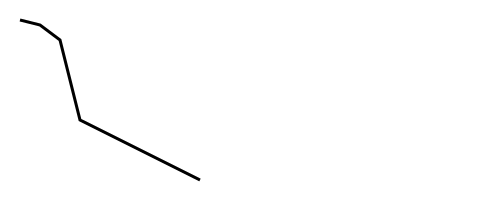

In [10]:
%%svg
<svg height="200" width="500">
  <polyline points="20,20 40,25 60,40 80,120 120,140 200,180" style="fill:none;stroke:black;stroke-width:3" />
  Sorry, your browser does not support inline SVG.
</svg>

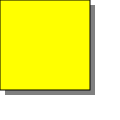

In [11]:
%%svg
<svg height="120" width="120">
  <defs>
    <filter id="filter" x="0" y="0">
      <feGaussianBlur stdDeviation="5" />
      <feOffset dx="5" dy="5" />
    </filter>
  </defs>
  <rect width="90" height="90" fill="grey" filter="url(#filter)" />
  <rect width="90" height="90" fill="yellow" stroke="black" />
  Sorry, your browser does not support inline SVG.  
</svg>

## Plotting with matplotlib

* python 2D plotting library 
* produces publication quality figures 
* hardcopy formats and **interactive environments**
* platform agnostic
* [examples](http://matplotlib.org/examples/index.html)

### Import necessary packages

In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pylab as plt

### An easier way

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


### Examples

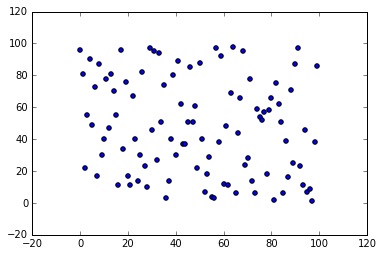

In [3]:
# Create some data
x = np.arange(100)
y = np.random.randint(0, 100, size=(100, 1))

# Create scatter plot
plt.scatter(x,y)

### Stylize

In [4]:
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 2 * matplotlib.rcParams['savefig.dpi']

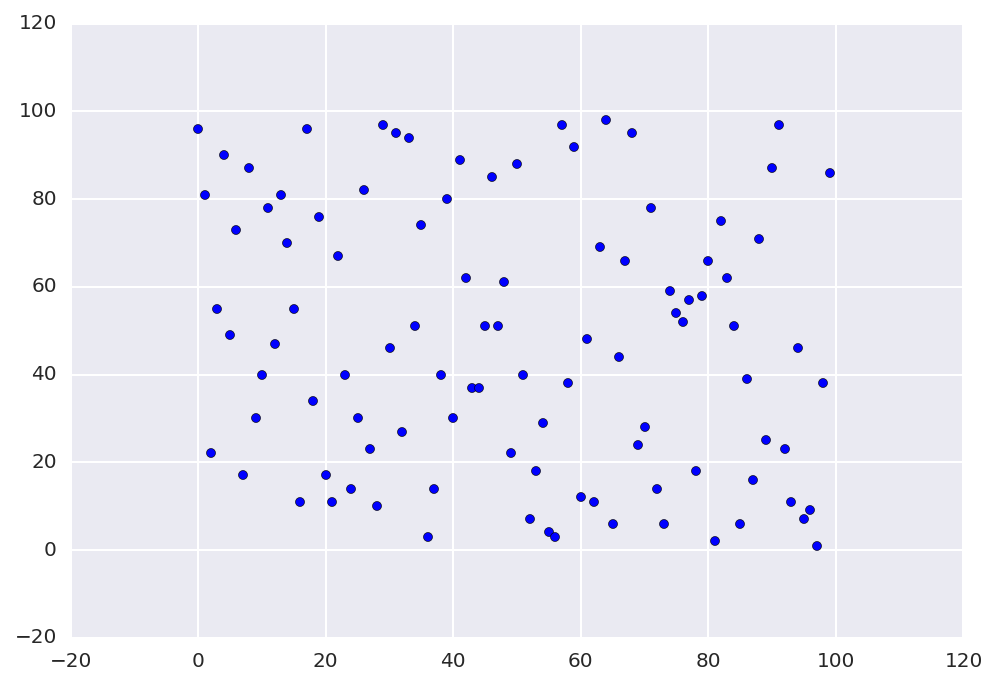

In [5]:
plt.scatter(x, y)

from mpl_toolkits.mplot3d import Axes3D
matplotlib.rcParams['legend.fontsize'] = 10

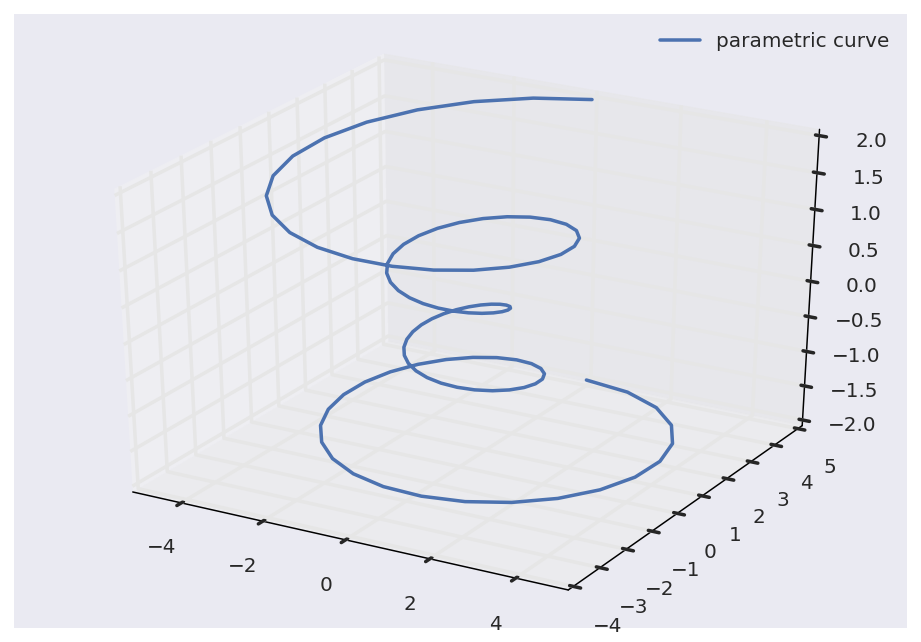

In [9]:
from mpl_toolkits.mplot3d import Axes3D
matplotlib.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d')
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z**2 + 1
x, y = (r * np.sin(theta), r * np.cos(theta))
ax.plot(x, y, z, label='parametric curve')
ax.legend()

plt.show()

## github.com/accre/Python

![ACCRE Python github repo](images/ACCRE_Python_github.png)
